In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import metrics

from sklearn.utils import class_weight
from collections import Counter

import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join

import pandas as pd

In [ ]:
train_loc = '/content/drive/MyDrive/output3/train'
test_loc = '/content/drive/MyDrive/output3/val'

In [ ]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=train_loc, target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=test_loc, target_size=(224,224))

Found 5515 images belonging to 8 classes.
Found 1383 images belonging to 8 classes.


In [ ]:
diagnosis_csv = '/content/drive/MyDrive/binary/output3/output3/patient_diagnosis.csv'
diagnosis = pd.read_csv(diagnosis_csv, names=['pId', 'diagnosis'])
diagnosis.head()

,pId,diagnosis
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


In [ ]:
categories = diagnosis['diagnosis'].unique()
categories

array(['URTI', 'Healthy', 'Asthma', 'COPD', 'LRTI', 'Bronchiectasis',
       'Pneumonia', 'Bronchiolitis'], dtype=object)

In [ ]:
from tensorflow.keras.applications import efficientnet as efn

In [ ]:
height = 224
width = 224
channels = 3
n_classes = 8
input_shape = (height, width, channels)

In [ ]:
import keras
from keras.models import Sequential, load_model
from keras.layers import Dropout, Dense, GlobalAveragePooling2D
from keras.optimizers import Adam


In [ ]:
efnb0 = efn.EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape, classes=n_classes)

model = Sequential()
model.add(efnb0)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

16705208/16705208 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 8)                 10248     
                                                                 
Total params: 4,059,819
Trainable params: 4,017,796
Non-trainable params: 42,023
_________________________________________________________________


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
import cv2
import albumentations as albu
from skimage.transform import resize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
import keras
from keras.models import Sequential, load_model
from keras.layers import Dropout, Dense, GlobalAveragePooling2D
from keras.optimizers import Adam

In [ ]:
optimizer = Adam(lr=0.0001)

#early stopping to monitor the validation loss and avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

#reducing learning rate on plateau
rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience= 5, factor= 0.5, min_lr= 1e-6, verbose=1)
#model compiling
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy','mae'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model_history = model.fit_generator(traindata, validation_data = testdata, callbacks = [early_stop, rlrop],verbose = 1, epochs = 25)

<ipython-input-17-88a2e0fce341>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model.fit_generator(traindata, validation_data = testdata, callbacks = [early_stop, rlrop],verbose = 1, epochs = 25)


Epoch 1/25
173/173 [==============================] - 77s 445ms/step - loss: 0.1626 - accuracy: 0.9467 - mae: 0.0231 - val_loss: 0.7754 - val_accuracy: 0.8214 - val_mae: 0.0466 - lr: 5.0000e-05
Epoch 2/25
173/173 [==============================] - 78s 450ms/step - loss: 0.1513 - accuracy: 0.9498 - mae: 0.0214 - val_loss: 0.7996 - val_accuracy: 0.8156 - val_mae: 0.0475 - lr: 5.0000e-05
Epoch 3/25
173/173 [==============================] - 77s 445ms/step - loss: 0.1343 - accuracy: 0.9547 - mae: 0.0188 - val_loss: 0.8183 - val_accuracy: 0.8156 - val_mae: 0.0467 - lr: 5.0000e-05
Epoch 4/25
173/173 [==============================] - 76s 436ms/step - loss: 0.1062 - accuracy: 0.9695 - mae: 0.0157 - val_loss: 0.8343 - val_accuracy: 0.8192 - val_mae: 0.0465 - lr: 5.0000e-05
Epoch 5/25
173/173 [==============================] - 77s 443ms/step - loss: 0.1016 - accuracy: 0.9677 - mae: 0.0149 - val_loss: 0.8838 - val_accuracy: 0.8200 - val_mae: 0.0468 - lr: 5.0000e-05
Epoch 6/25
173/173 [==========

In [ ]:
#saving the trained model weights as data file in .h5 format
model.save("main_efficientnetb0_weights", save_format="tf")

TypeError: ignored

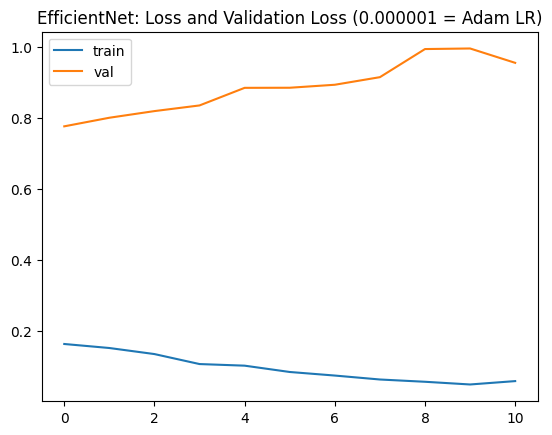

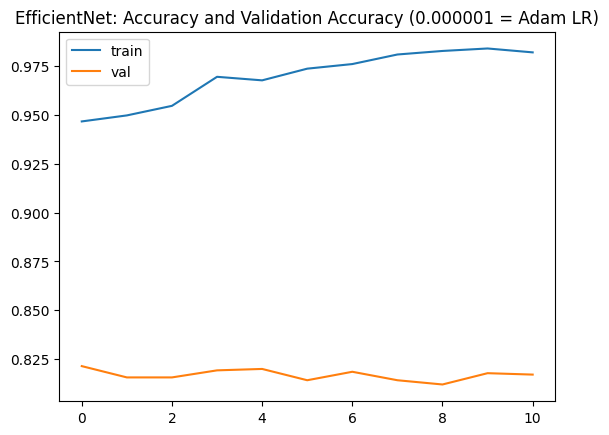

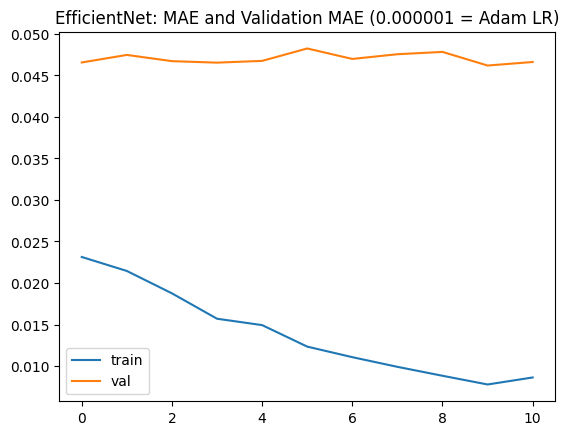

In [ ]:
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='val')
plt.title('EfficientNet: Loss and Validation Loss (0.000001 = Adam LR)')
plt.legend();
plt.show()

plt.plot(model_history.history['accuracy'], label='train')
plt.plot(model_history.history['val_accuracy'], label='val')
plt.title('EfficientNet: Accuracy and Validation Accuracy (0.000001 = Adam LR)')
plt.legend();
plt.show()

plt.plot(model_history.history['mae'], label='train')
plt.plot(model_history.history['val_mae'], label='val')
plt.title('EfficientNet: MAE and Validation MAE (0.000001 = Adam LR)')
plt.legend();
plt.show()

In [ ]:
model.evaluate(testdata)

44/44 [==============================] - 14s 302ms/step - loss: 0.7754 - accuracy: 0.8214 - mae: 0.0466


[0.7754340767860413, 0.8214027285575867, 0.04656096547842026]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
val_predict = model.predict(testdata)

44/44 [==============================] - 15s 302ms/step


In [ ]:
import numpy as np
predict_class = np.argmax(val_predict, axis=1)
predict_class = predict_class.tolist()

In [ ]:
labels = ['Asthma','Bronchiectasis','Bronchiolitis','COPD','Healthy','LRTI','Pneumonia','URTI']
report = classification_report(testdata.classes, predict_class, target_names=labels)
print(report)

                precision    recall  f1-score   support

        Asthma       0.00      0.00      0.00         2
Bronchiectasis       0.00      0.00      0.00        21
 Bronchiolitis       0.20      0.03      0.05        32
          COPD       0.84      0.89      0.86      1150
       Healthy       0.10      0.12      0.11        65
          LRTI       0.00      0.00      0.00         7
     Pneumonia       0.00      0.00      0.00        57
          URTI       0.00      0.00      0.00        49

      accuracy                           0.75      1383
     macro avg       0.14      0.13      0.13      1383
  weighted avg       0.70      0.75      0.72      1383



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(testdata.classes, predict_class)
cm_df = pd.DataFrame(cm,
                     index = ['Asthma','Bronchiectasis','Bronchiolitis','COPD','Healthy','LRTI','Pneumonia','URTI'],
                     columns = ['Asthma','Bronchiectasis','Bronchiolitis','COPD','Healthy','LRTI','Pneumonia','URTI'])

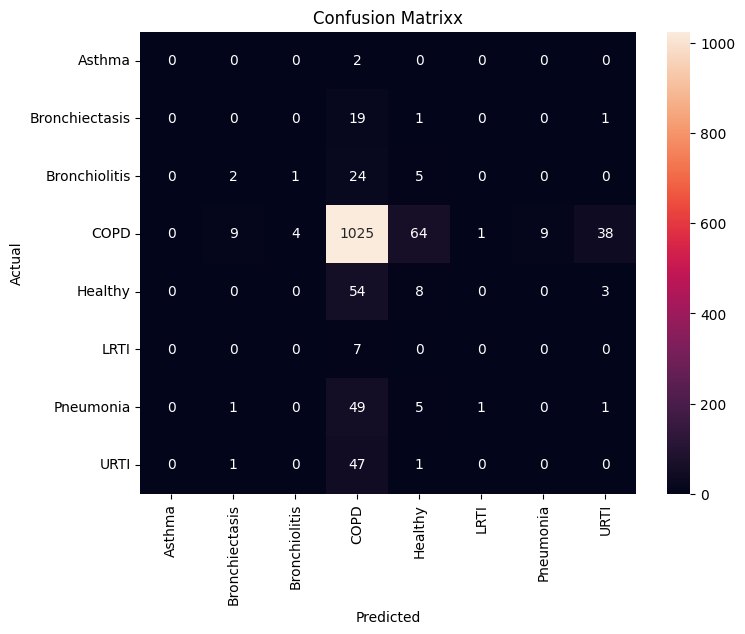

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d')
plt.title("Confusion Matrixx")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
import streamlit as st
import tensorflow as tf
from tensorflow import keras
import numpy as np


#model.save("main1_efficientnetb0_weights.h5")


tf.saved_model.save(model, "main_efficientnetb0_weights")
loaded_model = tf.saved_model.load("main_efficientnetb0_weights")
tf.keras.models.save_model(loaded_model, "main_efficientnetb0_weights.h5")



def main():
    st.title("Image Classification")
    uploaded_file = st.file_uploader(
        "Upload an image", type=["jpg", "jpeg", "png"])
    if uploaded_file is not None:
        # Save the uploaded image temporarily
        image_path = 'temp_image.jpg'
        with open(image_path, 'wb') as f:
            f.write(uploaded_file.getbuffer())
        # Preprocess the image
        image = keras.preprocessing.image.load_img(
            image_path, target_size=(224, 224))
        image = keras.preprocessing.image.img_to_array(image)
        image = np.expand_dims(image, axis=0)
        # Make predictions
        predictions = model.predict(image)
        # Get the predicted class
        class_index = np.argmax(predictions[0])
        # Define your class labels
        class_labels = ['Asthma', 'Bronchiectasis', 'Bronchiolitis',
                        'COPD', 'Healthy', 'LRTI', 'Pneumonia', 'URTI']
        predicted_class = class_labels[class_index]
        # Display the result
        st.write("Predicted class:", predicted_class)


if __name__ == "__main__":
    main()

AttributeError: ignored

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0

# Create an instance of the model architecture
model = EfficientNetB0()

# Save the model weights
model.save_weights("main_efficientnetb0_weights.h5")

# Load the model architecture
loaded_model = EfficientNetB0()

# Load the saved weights into the model
loaded_model.load_weights("main_efficientnetb0_weights.h5")

# Save the loaded model as a new h5 file
loaded_model.save("main_efficientnetb0_loaded.h5")


21834768/21834768 [==============================] - 2s 0us/step


TypeError: ignored